# Name: Yabets Ebren, Henry Wright
## CSCI 347: Data Mining
## Project 2
### Last Updated: 03/24/22

# Part 1

	For this part of the project, we will be referring to the ‘Social circles: Facebook’ dataset. This dataset is interesting because it adds an edge between two nodes (Facebook profiles) if they are ‘friends’ on Facebook. We find this dataset especially interesting because we think it does a great job of illustrating how close everyone in the world is, and how seemingly total strangers may be a mutual connection or two apart from each other. Although this specific dataset can only be applied to Facebook, we think that it is interesting to consider that everyone is closer in real life than they may think. 
    This specific dataset was pre-processed to preserve anonymity, meaning that things like usernames and political affiliations were reassigned to values like ‘anonymized feature 1’. The dataset contains 4038 nodes and 88234 edges, which was too big to process for our computers. We decided to take a random sample of 5000 edgess. To implement this we randomly chose a range of 5000 and sliced that part of the edge list using python's builtin islice method. 
    This data does not include every Facebook profile, but rather it was created with a population of volunteers who participated in a survey on the Facebook app. In this dataset, we may expect people with high centrality values to have a higher than average number of Facebook friends. 

# Part 2

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import csv
import math
from itertools import islice
import random as rand

In [44]:
# calculates number of vertices given a 
# list of edges where each edge is a pair
def Num_Vect(li):
    
    # checks if a list is provided
    if type(li) is list:
            new_arr = []
            for a, b in li:
                if a not in new_arr:
                    new_arr.append(a)
                if b not in new_arr:
                    new_arr.append(b)
            
            # returns number of vertices
            return len(new_arr)
        
    # raises error message if a list is not given
    raise Error("please provide a list")

In [45]:
# calculates degree of a vertex given a list of 
# edges where each edge is a pair and a vertex    
def Vert_Deg(li, x):
    
    # checks if a list is provided
    if type(li) is list:
        degree = 0
        # find the degree by counting how many edges the vertex has
        for a,b in li:
            # since the graph is undirected and there are no (i,i) nodes,
            # used this method to increase efficency 
            if x == a or x == b:
                degree+=1
            
        return degree
    # raises error message if a list is not given
    else:
        raise Error("please provide a list")

In [46]:
# calculates clustering coefficent given a list of 
# edges where each edge is a pair and a vertex    
def Clus_Coef(li, x):
    
    # checks if a list is provided
    if type(li) is list:
        edge = 0
        pair_arr = []
        
        # calculate the degree of the given vertex
        deg = Vert_Deg(li, x)
        
        for pairs in li:
            for a in pairs:
                # select the given node and 
                # add all its neighbors to an array
                if x == a:
                    for i in pairs:
                        if i != a:
                            if i not in pair_arr:
                                pair_arr.append(i)
                                
        # duplicate the array to create edges 
        # between all the neighbors of the vertex            
        new_arr = pair_arr
        neigh_edge = [(i, j) for i in pair_arr for j in new_arr if i != j] 
        
        # find the edges that are found in the original graph
        for edgex in li:
            for edgey in neigh_edge:
                if edgex == edgey:
                    edge+=1
        # clustering coefficent will be 0 if there is no edge 
        # between the neighbors of the vertex
        if edge == 0:
            return 0
        clus_coef = 2*(edge)/(deg*(deg - 1))
        return clus_coef
        
    # raises error message if a list is not given
    else:
        raise Error("please provide a list")

In [47]:
# calculates betweness centrality given a list of 
# edges where each edge is a pair and a vertex    
def Bet_Cent(li, x):
    
    # checks if a list is provided
    if type(li) is list:
        # convert to networkx graph to get shortest path
        G = nx.Graph()
        G.add_edges_from(li)

        # add all nodes in graph to an array except the one used
        arr = []
        for pairs in li:
            if pairs[0] != x:
                if pairs[0] not in arr:
                    arr.append(pairs[0])
            if pairs[1] != x:
                if pairs[1] not in arr:
                    arr.append(pairs[1])

        betweenness = 0
        
        for i in arr:
            for j in arr:
                if j > i:
                    # find all shortest paths and 
                    # calculate betweness centrality
                    short_paths = nx.all_shortest_paths(G, source=i, target=j)
                    short_with_x = 0
                    all_shortest = 0
                    for path in short_paths:
                        all_shortest += 1
                        if x in path:
                            short_with_x += 1
                    betweenness +=(short_with_x/all_shortest)
        return betweenness
    
    # raises error message if a list is not given
    else:
        raise Error("please provide a list")

In [48]:
# returns Adjacency Matrix given a list of edges where each edge is a pair
def Adj_Mat(li):
    
    # checks if a list is provided
    if type(li) is list:
        arr=[]
        # go through the vertices and find the largest vertex
        for a,b in li:
            arr.append(a)
            arr.append(b)
        # Since we deal with undirected graphs, 
        # the adjacency matrix is always symetric
        # and its column and row will have 
        # the size of the largest node
        row = col = max(arr)
        # initialize an array of zeros with the size of row & col
        matx = np.zeros((row, col), dtype=int)
        # loop through vertices 
        for pairs in li:
            # the matrix will have value 1 for position of the 
            # vertex and the rest will be zero  
            matx[pairs[0]-1][pairs[1]-1] = 1
            # because the graph is undirected both (i, j) 
            # and (j, i) must have 1
            matx[pairs[1]-1][pairs[0]-1] = 1
        return matx
    else:
        raise Error("List not provided")

In [49]:
# calculates prestige centrality given a dense adjacency matrix:   
def Pres_Cent(mat):
    last_normalized_value = -1
    
    np_mat = np.array(mat)
    # Create initial column vector based on mat dimensions: 
    rows, columns = np_mat.shape
    column_vector = np.full(rows,1).reshape(rows,1)
    
    
    while (True):
        # Multiply adjacency matrix by column vector (of all 1s).
        matrix_dot_colVector = np.dot(np_mat,column_vector)
        # Normalize the output. 
        sum = 0
        for i in matrix_dot_colVector:
            sum += i**2
        normalized_value = math.sqrt(sum)
        
        
        normalized_col_vector = matrix_dot_colVector/normalized_value
        
        # Check if there was a previous normalized output:
        # If there was not... 
        if (last_normalized_value == -1):
            column_vector = normalized_col_vector
            last_normalized_value = normalized_value
        # If there was... 
        elif (last_normalized_value != -1):
            # ... and it is ~equal to the most recent normalized value, return
            if (round(normalized_value, 6) == round(last_normalized_value, 6)):
                return normalized_col_vector
            else:
                column_vector = normalized_col_vector
                last_normalized_value = normalized_value
    
    # Multiply the normalized output ^ by the adjacency matrix... etc. 
    # Until normalized value converge

In [50]:
# +++++++++++++++++ TEST INPUTS +++++++++++++++++++

graph_0 = [(1,2), (2,3), (2,4), (3,5),(4,5),(5,6)]
graph_1 = [(1,2), (2,3), (3,4), (4,5),(5,1)]
graph_2 = [(1,2),(1,3), (2,3),(2,4) ,(3,4), (4,5),(5,1)]
g2 = nx.Graph()
for edge in graph_2:
    g2.add_edge(edge[0], edge[1])
graph_3 = [(1,2),(1,3), (2,3),(2,4) ,(3,4),(3,6), (4,5),(5,1),(6,7),(6,8), (7,8), (8,9) ]
g3 = nx.Graph()
for edge in graph_3:
    g3.add_edge(edge[0], edge[1])
g1 = nx.Graph()
for edge in graph_1:
    g1.add_edge(edge[0], edge[1])

g4 = nx.path_graph(50)

graph_4 = []
for line in nx.generate_edgelist(g4, data=False):
    vi = int(line.split()[0])
    vj = int(line.split()[1])
    pair = (vi, vj)
    graph_4.append(pair)
g5 = nx.complete_graph(7)
graph_5 = []
for line in nx.generate_edgelist(g5, data=False):
    vi = int(line.split()[0])
    vj = int(line.split()[1])
    pair = (vi, vj)
    graph_5.append(pair)
g6 = nx.cycle_graph(8)
graph_6 = []
for line in nx.generate_edgelist(g6, data=False):
    vi = int(line.split()[0])
    vj = int(line.split()[1])
    pair = (vi, vj)
    graph_6.append(pair)
n=200 # number of nodes for Barabasi-Albert graph
q=4 # number of edges each new node has in the generation process of BA graph

g7 = nx.barabasi_albert_graph(n, q, seed=34)
graph_7 = []
for line in nx.generate_edgelist(g7, data=False):
    vi = int(line.split()[0])
    vj = int(line.split()[1])
    pair = (vi, vj)
    graph_7.append(pair)
g8 = nx.erdos_renyi_graph(100,0.13, seed=15)
graph_8 = []
for edge in g8.edges():
    graph_8.append(edge)

# +++++++++++++++++++++++++++++++++++++++++++

print("There are", Num_Vect(graph_0),"nodes")
print("This vertex has a degree of", Vert_Deg(graph_4, 25))
print("This vertex has a clustering coefficent of", Clus_Coef(graph_3,3))
print("Betweeness Centrality:",Bet_Cent(graph_8,39))
print("The adjacency matrix of this graph is:\n",Adj_Mat(graph_2))
adj_mat = Adj_Mat(graph_5)
print("Prestige Centrality:\n",Pres_Cent(adj_mat))



There are 6 nodes
This vertex has a degree of 2
This vertex has a clustering coefficent of 0.3333333333333333
Betweeness Centrality: 86.18112583907737
The adjacency matrix of this graph is:
 [[0 1 1 0 1]
 [1 0 1 1 0]
 [1 1 0 1 0]
 [0 1 1 0 1]
 [1 0 0 1 0]]
Prestige Centrality:
 [[0.39459932]
 [0.39459932]
 [0.39459932]
 [0.39459932]
 [0.39459932]
 [0.47059206]]


# Part 3 

In [51]:
def data_preprocess():
    with open('facebook.txt') as data:
        data_reader = csv.reader(data, delimiter=' ')
        nodes = []
        edge_list = []
        G = nx.Graph()

    # the total number of pairs = 88234
    # we are randomly selecting and using 5000
        leng = 0
        for row in islice(data_reader, 45000, 50000):
            fromNode = int(row[0])
            toNode = int(row[1])
            edge = [fromNode, toNode]
            edge_list.append(edge)
            G.add_edge(fromNode, toNode)
        return edge_list, G
Edges, G = data_preprocess()

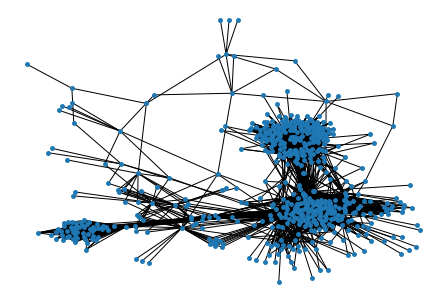

In [52]:
# graph visualization 
nx.draw(G, node_size=15)

In [53]:
# Used to find 10 nodes with highest degree: 
degrees = {node:val for (node, val) in G.degree()}
dic2=dict(sorted(list(degrees.items())[:10],key= lambda x:x[1], reverse=True))
print("Top 10 Nodes with Highest degree:",dic2,"\n")


Top 10 Nodes with Highest degree: {1993: 119, 2266: 21, 2271: 18, 2275: 16, 2276: 14, 2278: 14, 2253: 12, 2257: 10, 2261: 10, 2258: 5} 



In [54]:
# Used to find 10 nodes with highest betweenness centrality: 
betweenness_centrality_sorted = sorted(list(nx.betweenness_centrality(G).items())[:10]
                                       ,key= lambda x:x[1], reverse=True)
print("Top 10 Nodes with Highest Betweenness Centrality:",betweenness_centrality_sorted,"\n")


Top 10 Nodes with Highest Betweenness Centrality: [(1993, 0.01840332241670149), (2266, 0.0015993186616967696), (2271, 2.871066704261745e-05), (2275, 2.5159758870685174e-05), (2278, 2.1595673607352686e-05), (2276, 2.1392164122139918e-05), (2253, 9.581996134346064e-06), (2257, 9.050491761480845e-06), (2261, 8.284380487682328e-06), (2258, 4.044315707859181e-06)] 



In [55]:
# Used to find 10 nodes with highest clustering coefficient: 
clustering_coefficient_sorted = sorted(list(nx.clustering(G).items())[:10]
                                       ,key= lambda x:x[1], reverse=True)
print("Top 10 Nodes with Highest Clustering Coefficent:",clustering_coefficient_sorted,"\n")


Top 10 Nodes with Highest Clustering Coefficent: [(2253, 0.6666666666666666), (2257, 0.6222222222222222), (2261, 0.6222222222222222), (2271, 0.6209150326797386), (2275, 0.5916666666666667), (2276, 0.5824175824175825), (2278, 0.5604395604395604), (2258, 0.5), (2266, 0.49047619047619045), (1993, 0)] 



In [56]:
# Used to find 10 nodes with highest prestige centrality: 
prestige_centrality_sorted = sorted(list(nx.eigenvector_centrality(G).items())[:10]
                                    ,key= lambda x:x[1], reverse=True)
print("Top 10 Nodes with Highest Prestige Centrality:",prestige_centrality_sorted,"\n")

Top 10 Nodes with Highest Prestige Centrality: [(1993, 0.1183490903739492), (2266, 0.06765950646108355), (2271, 0.06470636976210946), (2275, 0.057872155866721724), (2276, 0.05081424035186424), (2278, 0.04959672468412553), (2253, 0.0470446929528244), (2261, 0.038954799125602145), (2257, 0.03585018599963835), (2258, 0.017929037820988477)] 



In [57]:
# Used to find 10 nodes with highest Pagerank: 
pagerank_sorted = sorted(list(nx.pagerank(G).items())[:10]
                         ,key= lambda x:x[1], reverse=True)
print("Top 10 Nodes with Highest Pagerank:",pagerank_sorted,"\n")

Top 10 Nodes with Highest Pagerank: [(1993, 0.008781494330991327), (2266, 0.0015661602934965188), (2271, 0.0013355381553034405), (2275, 0.0012173193289408972), (2278, 0.001098222909305123), (2276, 0.0010942070831350475), (2253, 0.0009694241244788517), (2257, 0.0008599409259153868), (2261, 0.0008528074916824459), (2258, 0.0005603394092872362)] 

